### Notes of Chapter 4

Haiyang Yu, 04/16/2018

In [1]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

### Joint PDF of two independent random variables

If $ X$ ~ $N(\mu_1, \sigma_1^2)$, $Y$ ~ $N(\mu_2, \sigma_2^2)$ are independent random variables, what is the PDF of $Z = X + Y$?

Solution: $Z$ ~ $N(\mu_1+\mu_2, \sigma_1^2 + \sigma_2^2)$


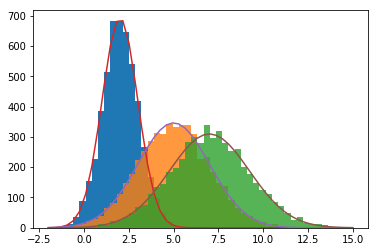

In [2]:
n = 5000
x = stats.norm.rvs(loc=2.0, scale=1.0, size=n)
y = stats.norm.rvs(loc=5.0, scale=2.0, size=n)
z = x + y

rv = np.linspace(-2,15,50)
xpdf = plt.hist(x, bins=rv) 
ypdf = plt.hist(y, bins=rv, alpha=0.8) 
zpdf = plt.hist(z, bins=rv, alpha=0.8) 


plt.plot(rv, stats.norm.pdf(rv, loc=2.0, scale=1.0)*n*(rv[1]-rv[0]) )
plt.plot(rv, stats.norm.pdf(rv, loc=5.0, scale=2.0)*n*(rv[1]-rv[0]) )
plt.plot(rv, stats.norm.pdf(rv, loc=7.0, scale=np.sqrt(5.0) )*n*(rv[1]-rv[0]) )


### Jacobian transformation of joint PDF

Transformation of two random variables $(x,y)$ to $(u,v)$:
$$ f(u,v) = f(x,y)|J| $$

$$J = \left| \begin{array}{a} 
        \frac{\partial x}{\partial u}, \frac{\partial x}{\partial v} \\
        \frac{\partial y}{\partial u}, \frac{\partial y}{\partial v} \\
        \end{array} \right| $$

General transformation from $\vec{X} = (x_1, x_2, ..., x_n)$ to $\vec{Y} = (y_1, y_2, ..., y_m)$:
$$ f(\vec{Y}) = f(\vec{X})|J| $$

$$ J = \left( \begin{array}{a} 
        \frac{\partial x_1}{\partial y_1}, \frac{\partial x_1}{\partial y_2}, ..., \frac{\partial x_1}{\partial y_m} \\
        ... \\
        \frac{\partial x_n}{\partial y_1}, \frac{\partial x_n}{\partial y_2}, ..., \frac{\partial x_n}{\partial y_m} \\
        \end{array} \right) $$

Proof:
Given $\vec{Y}=g(\vec{X}), \vec{X} \in A \subset \boldsymbol{R}^{n}, \vec{Y} \in B \subset \boldsymbol{R}^{m}$, the probability of $\vec{Y}$ is

$$ \int_{B} f(\vec{Y}) d\vec{Y} = \int_{A} f(\vec{X}) d\vec{X} = \int_{B} f(g^{-1}(\vec{Y})) \boldsymbol{J} d\vec{Y} $$

If n>m, fill the extra variables $y_{m+1}, ..., y_n$ with variables from $\vec{\boldsymbol{X}}$;

If n<m, fill the extra variables $x_{n+1}, ..., x_m$ with variables from $\vec{\boldsymbol{X}}$;

Note: make sure the mapping is one-to-one after filling the extra variables.


### Example 1

Given two independent randome variables following uniform distribution $X,Y$ ~ $U(0,1)$, find PDF of $U=X+Y$ and $V=X-Y$.

Solution:
$$f(x,y) = f(x)f(y) = 1$$

$$ J = \left| \begin{array} {a} 
    \frac{1}{2}, \frac{1}{2} \\
    \frac{1}{2}, -\frac{1}{2} \\
    \end{array} \right| = -\frac{1}{2}$$

The support set is $ \{(u,v): -1<u<1, |u|<v<|2-u| \}$

$$f(u,v) = f(x,y)|J| = \frac{1}{2} $$

$$f(u) = \int_{-1}^{1}f(u,v)dv \\
    = \left\{ \begin{array} {a}
    \int_{-u}^{u}\frac{1}{2}dv = u,\ if\ 0<u<1; \\
    \int_{u-2}^{2-u}\frac{1}{2}dv = 2-u,\ else. \\
    \end{array} \right.  $$


(-2, 2, -2, 2)

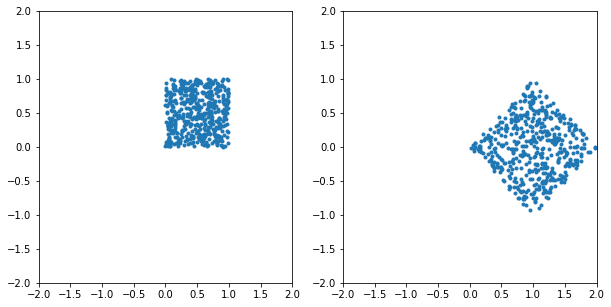

In [15]:
n = 500
x = stats.uniform.rvs(size=n)
y = stats.uniform.rvs(size=n)
u = x+y
v = x-y

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y,'.')
plt.axis((-2,2,-2,2))

plt.subplot(1,2,2)
plt.plot(u,v,'.')
plt.axis((-2,2,-2,2))


### Example 2

Given two independent random variables following exponential distribution $X, Y$ ~ $exp(\lambda=1)$, find PDF of $U = \frac{X-Y}{X+Y}$.

Solution: 
$$ f(x,y) = f(x)f(y) = e^{-(x+y)} $$
Let $V = X+Y$, then

$$ J = \left| \begin{array} {a} 
    \frac{1}{2}v, \frac{1}{2}(1+u) \\
    -\frac{1}{2}v, \frac{1}{2}(1-u) \\
    \end{array} \right| = \frac{1}{2}v$$

The support set is $ \{(u,v): -1<u<1, 0<v<\infty \}$

$$f(u,v) = f(x,y)|J| = \frac{1}{2} v e^{-v}$$

$$f(u) = \int_{-1}^{1}f(u,v)dv = \frac{1}{2}$$

, which means $U$ ~ $U(-1, 1)$.
